In [1]:
import matplotlib.pyplot as plt
import ternary
from matplotlib import gridspec
import numpy as np
import matplotlib as mpl

### the paper has triangle position = predicted, color = true
### this is done for F(i)M/AFM/NM and for FM/FiM

In [9]:
import re
with open('testing_results.txt', 'r') as f:
    dump = f.read()
    # testing_preds = re.findall('Prediction: . Actual: tensor\(\[.\]', dump)
    testing_outputs = re.findall('\[\[.*, .*, .*\]\]', dump)

testing_outputs = [eval(output)[0] for output in testing_outputs]
testing_outputs = [(t[0] / sum(t), t[1] / sum(t), t[2] / sum(t)) for t in testing_outputs]
testing_outputs[0]

In [11]:
encoding = ["NM", "AFM", "FM/FiM"]

with open('y_pred.txt', 'r') as f:
    y_pred = eval(f.read().split('\n')[1])
with open('y_test.txt', 'r') as f:
    y_test = eval(f.read().split('\n')[1])

In [37]:
true_NM = []
true_AFM = []
true_FM = []

for i, t in enumerate(testing_outputs):
    if y_test[i] == 0:
        true_NM.append(t)
    elif y_test[i] == 1:
        true_AFM.append(t)
    elif y_test[i] == 2:
        true_FM.append(t)

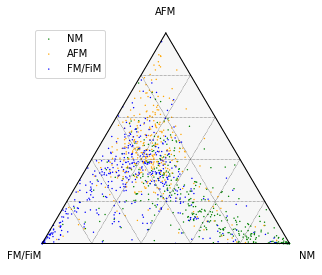

In [41]:
fig = plt.figure(constrained_layout=True,figsize=(8,4))
fontsize = 10
offset = 0.14
gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.1,height_ratios= [7,1],figure=fig)
ax = fig.add_subplot(gs[0, 0])

figure, tax = ternary.figure(ax=ax,scale=1.0)
# make each label a separate color
sc0 = tax.scatter(true_NM, s=2, edgecolors='none', c='green', label='NM')
sc1 = tax.scatter(true_AFM, s=2, edgecolors='none', c='orange', label='AFM')
sc2 = tax.scatter(true_FM, s=2, edgecolors='none', c='blue', label='FM/FiM')
tax.boundary(linewidth=1)
tax.gridlines(multiple=0.2, color="black")
tax.right_corner_label("NM", fontsize=fontsize)
tax.top_corner_label("AFM", fontsize=fontsize)
tax.left_corner_label("FM/FiM", fontsize=fontsize)
tax.get_axes().axis('off')

tax.legend(loc='upper left',fontsize=fontsize)
